In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from  scipy import stats
from scipy import fftpack
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution. OK
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution. OK

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.


p-value = 0.0005279431738299246


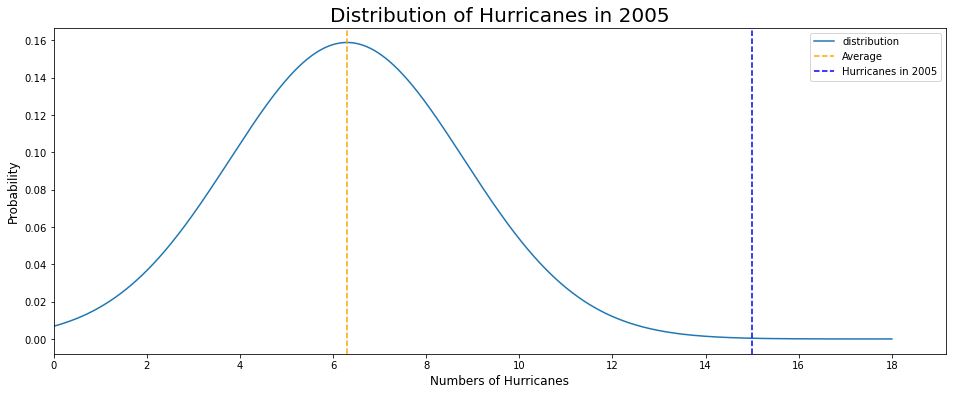

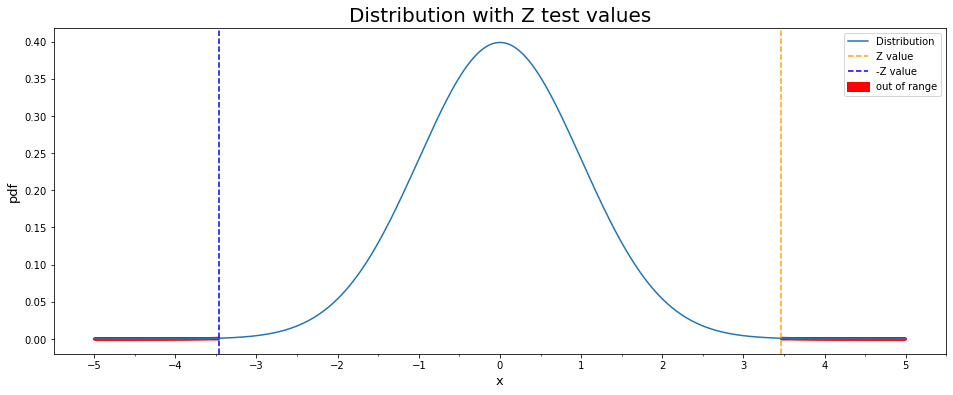

In [25]:
hurr_num = 15
hurr_aver = 6.3 
diff = hurr_num - hurr_aver
sigma = np.sqrt(hurr_aver)

z_test = diff/sigma

fig, ax = plt.subplots(figsize=(16,6))
xs = np.linspace(hurr_aver - diff -3, hurr_aver + diff +3, 1000)
ts = stats.norm.pdf(xs, loc = hurr_aver, scale = sigma)
ax.plot(xs, ts, label = 'distribution')
ax.axvline(hurr_aver, linestyle='--', color='orange', label = 'Average')
ax.axvline(hurr_num, linestyle='--', color='blue', label = 'Hurricanes in 2005')
ax.legend()
ax.set_xlabel('Numbers of Hurricanes', size = 12)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.set_xlim(0)
ax.set_ylabel('Probability', size = 12)
plt.title("Distribution of Hurricanes in 2005", size = 20)

#compute p-value
pvalue = stats.norm.cdf(-z_test) + (1. - stats.norm.cdf(z_test))  
print("p-value =", pvalue)


#Printing T-Student distribution
fig, ax = plt.subplots(figsize=(16,6))
x = np.linspace(-5, +5, 1000)
y = stats.norm.pdf(x)
ax.plot(x, y, label = 'Distribution')
ax.fill_between(x, y, where=np.abs(x) > z_test, color='red', label = 'out of range', linewidth = 3)
ax.axvline(z_test, linestyle='--', color='orange', label = 'Z value')
ax.axvline(-z_test, linestyle='--', color='blue', label = '-Z value')
ax.set_title('Distribution with Z test values', size = 20)
ax.set_ylabel("pdf", size =13)
ax.set_xlabel("x", size = 13)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend(loc = 'upper right')


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Mean values of pre and post exposition at halogen lamps 
 Pre =  116.7 
 Post = 135.4

Total sigma 11.04158805003459

The T student is: 3.786997938137629
p-value = 1.9956975358671354


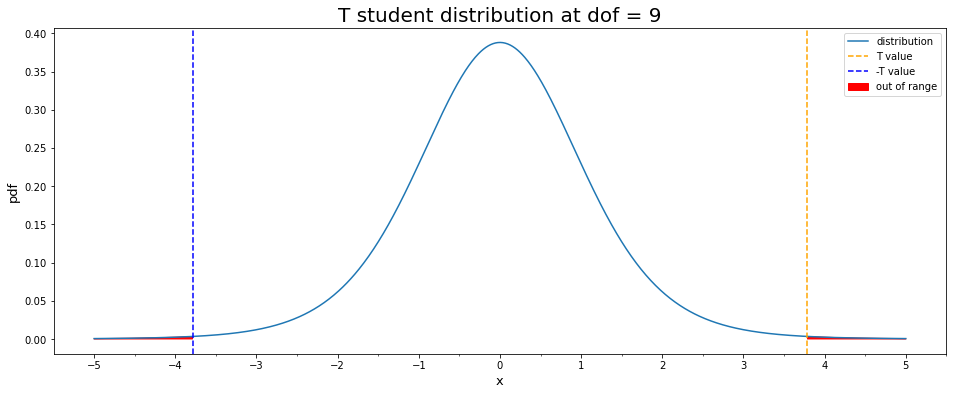

In [22]:
#array of data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
tot = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135,120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
num = len(pre)

#statistic values of data
pre_mean = np.mean(pre)
post_mean = np.mean(post)
pre_s = np.sqrt(np.var(pre, ddof=1)) #non troppo sicura che ddof sia 1
post_s = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((pre_s**2+post_s**2)/2)

print('Mean values of pre and post exposition at halogen lamps \n Pre = ', pre_mean, '\n Post =', post_mean)
print('\nTotal sigma', sigma)

#Definition of T-Student function
def TStudent (n, x1, x2, s):
    return abs(x1-x2)/(s*np.sqrt(2/n))

#Calculation of T-Student 
T = TStudent(num, pre_mean, post_mean, sigma)
print('\nThe T student is:', T)

#Printing T-Student distribution
fig, ax = plt.subplots(figsize=(16,6))
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, num - 1)
ax.plot(xs, ts, label = 'distribution')
ax.fill_between(xs, ts, where=np.abs(xs) > T, color='red', label = 'out of range')
ax.axvline(T, linestyle='--', color='orange', label = 'T value')
ax.axvline(-T, linestyle='--', color='blue', label = '-T value')
ax.set_title('T student distribution at dof = 9', size = 20)
ax.set_ylabel("pdf", size =13)
ax.set_xlabel("x", size = 13)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend(loc = 'upper right')


# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, num - 1) + (1. - stats.t.cdf(-T, num - 1))
print("p-value =", pvalue)

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Hares peak frequency: 0.09523809523809523
Lynx peak frequency: 0.09523809523809523
Carrot peak frequency: 0.09523809523809523


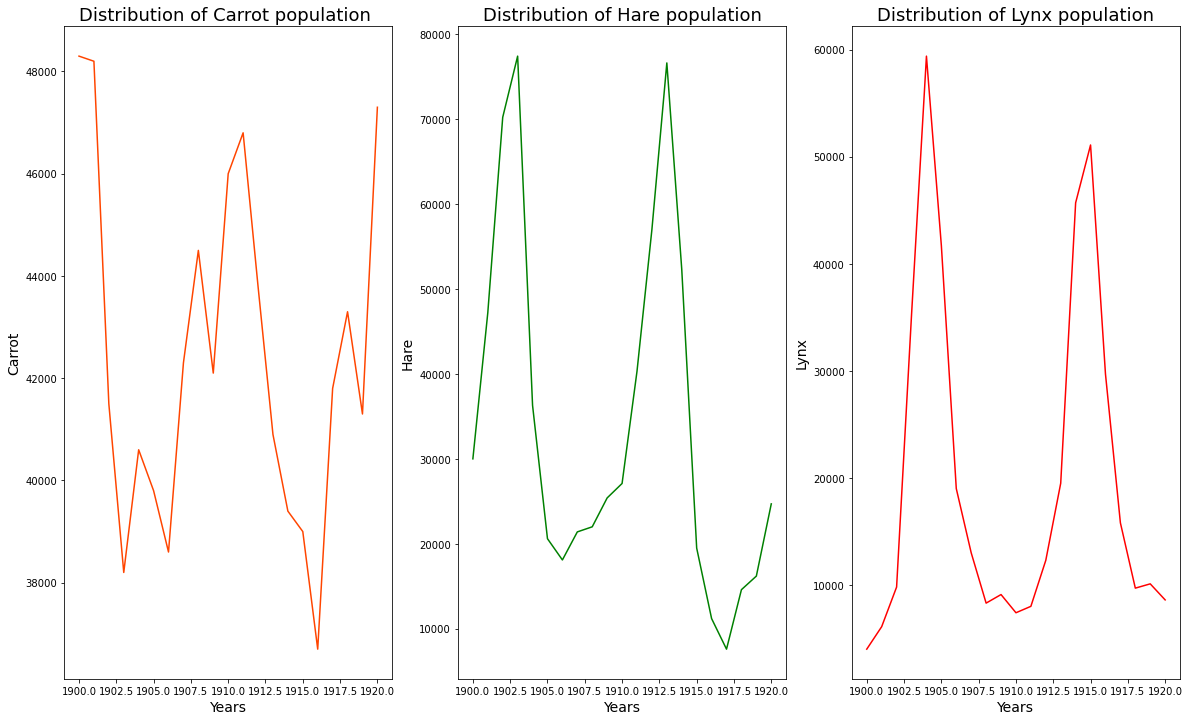

In [85]:
from scipy.fftpack import fft
from matplotlib.gridspec import GridSpec
#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P /

#opening the txt file with data and converting it into pd dataframe
data = pd.read_csv('populations.txt', delimiter = '\t')
years = np.array(data['# year'])
lynxPopulation = np.array(data['lynx'])
harePopulation = np.array(data['hare'])
carrotPopulation = np.array(data['carrot'])

fig = plt.figure(figsize=(20,12))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.plot(years,carrotPopulation, label = 'Carrot population', color ='orangered')
ax1.set_title('Distribution of Carrot population ', fontsize = 18)
ax1.set_xlabel('Years', fontsize = 14)
ax1.set_ylabel('Carrot', fontsize = 14)

ax2.plot(years,harePopulation, label = 'Hare population', color ='g')
ax2.set_title('Distribution of Hare population', fontsize = 18)
ax2.set_xlabel('Years', fontsize = 14)
ax2.set_ylabel('Hare', fontsize = 14)

ax3.plot(years,lynxPopulation, label = 'Lynx population', color ='r')
ax3.set_title('Distribution of Lynx population', fontsize = 18)
ax3.set_xlabel('Years', fontsize = 14)
ax3.set_ylabel('Lynx', fontsize = 14)

timeStep = 1

#fourier transformations
FFTHare = fftpack.fft(harePopulation) 
FFTLynx = fftpack.fft(lynxPopulation)
FFTCarrot = fftpack.fft(carrotPopulation)

#power spectra
HarePow = np.abs(FFTHare)
LynxPow = np.abs(FFTLynx)
CarrotPow = np.abs(FFTCarrot) 

#frequencies
HareFreq = fftpack.fftfreq(harePopulation.size, d=timeStep)
LynxFreq = fftpack.fftfreq(lynxPopulation.size, d=timeStep)
CarrotFreq = fftpack.fftfreq(carrotPopulation.size, d=timeStep)


HareMask = np.where(HareFreq > 0)
HareF = HareFreq[HareMask]
HPowes = HarePow[HareMask]
HareMax = HareF[HPowes.argmax()]
print("Hares peak frequency:", HareMax)


LynxMask = np.where(LynxFreq > 0)
LynxF = LynxFreq[LynxMask]
LPowes = LynxPow[LynxMask]
LynxMax = LynxF[LPowes.argmax()]
print("Lynx peak frequency:", LynxMax)

CarrotMask = np.where(CarrotFreq > 0)
CarrotF = CarrotFreq[CarrotMask]
CPowes = CarrotPow[CarrotMask]
CarrotMax = CarrotF[CPowes.argmax()]
print("Carrot peak frequency:", CarrotMax)





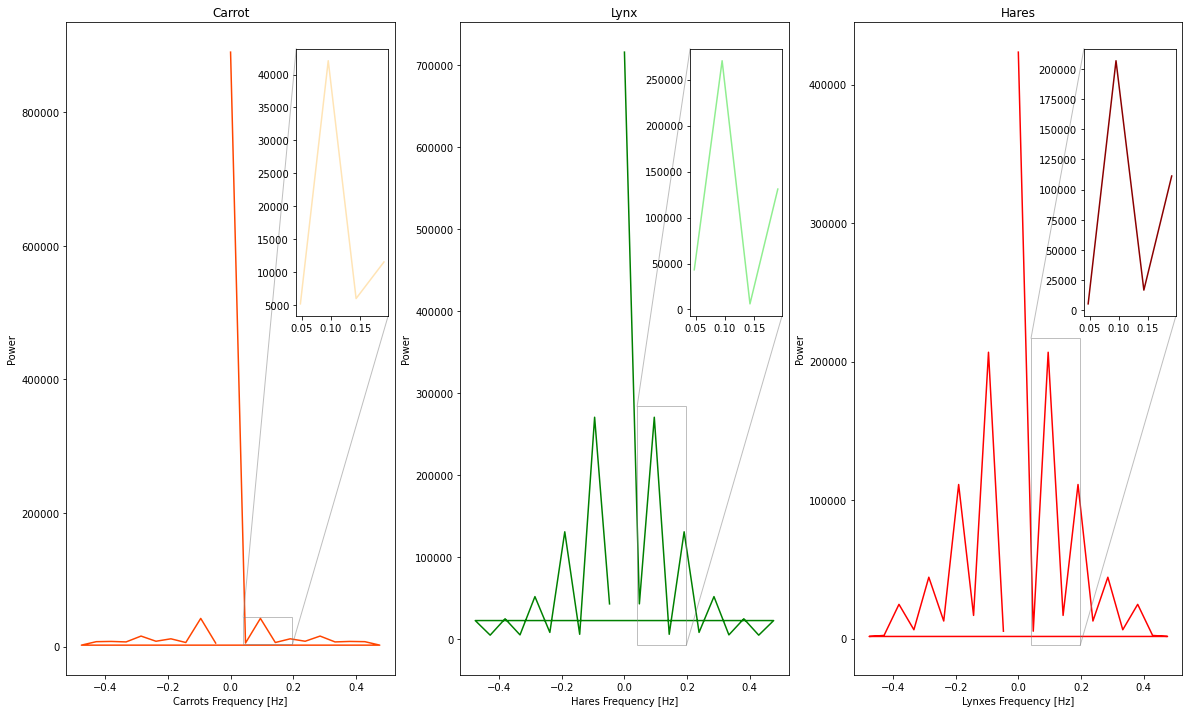

Frequency hares peak :  0.09523809523809523 years^(-1) 
Period hares : 10.5 years

Frequency lynxes peak :  0.09523809523809523 years^(-1)  
Period lynxes : 10.5 years

Frequency carrots peak :  0.09523809523809523 years^(-1) 
Period carrots: 10.5 years



In [86]:
# Plot 
fig2 = plt.figure(figsize=(20,12))
gs2 = GridSpec(1, 3, width_ratios=[1, 1, 1])
ax4 = fig2.add_subplot(gs[0])
ax5 = fig2.add_subplot(gs[1])
ax6 = fig2.add_subplot(gs[2])

#hare plot
ax5.set_xlabel('Hares Frequency [Hz]')
ax5.set_ylabel('Power')
ax5.set_title('Lynx')

ax5.plot(HareFreq, HarePow, color = 'g')

axes2 = ax5.inset_axes([0.7, 0.55, 0.28, 0.41])
axes2.plot(HareF[:4], HPowes[:4], color = 'lightgreen')
ax5.indicate_inset_zoom(axes2)


#lynx plot
ax6.set_xlabel('Lynxes Frequency [Hz]')
ax6.set_ylabel('Power')
ax6.set_title('Hares')
ax6.plot(LynxFreq, LynxPow, color = 'r')
axes3 = ax6.inset_axes([0.7, 0.55, 0.28, 0.41])
axes3.plot(LynxF[:4], LPowes[:4], color = 'darkred')
ax6.indicate_inset_zoom(axes3)

#carrot plot
ax4.set_xlabel('Carrots Frequency [Hz]')
ax4.set_ylabel('Power')
ax4.set_title('Carrot')
ax4.plot(CarrotFreq, CarrotPow, color = 'orangered')
axes1 = ax4.inset_axes([0.7, 0.55, 0.28, 0.41])
axes1.plot(CarrotF[:4], CPowes[:4], color = 'moccasin')
ax4.indicate_inset_zoom(axes1)



plt.show()

print('Frequency hares peak : ', HareMax, 'years^(-1) \nPeriod hares :', 1/HareMax, 'years\n')
print('Frequency lynxes peak : ', LynxMax, 'years^(-1)  \nPeriod lynxes :', 1/LynxMax, 'years\n')
print('Frequency carrots peak : ', CarrotMax, 'years^(-1) \nPeriod carrots:', 1/CarrotMax, 'years\n')


In [78]:
H_high_freq_fft = FFTHare.copy()
L_high_freq_fft = FFTLynx.copy()
C_high_freq_fft = FFTCarrot.copy()

# filter (set to zero) all high frequency components that are larger than peak_freq
H_high_freq_fft[np.abs(HareFreq) > HareMax] = 0
L_high_freq_fft[np.abs(LynxFreq) > LynxMax] = 0
C_high_freq_fft[np.abs(CarrotFreq) > CarrotMax] = 0

# calculate the Inverse Fast Fourier Transform
H_filtered_sig = fftpack.ifft(H_high_freq_fft)
L_filtered_sig = fftpack.ifft(L_high_freq_fft)
C_filtered_sig = fftpack.ifft(C_high_freq_fft)

H_filtered_sig = fftpack.ifft(H_high_freq_fft)
L_filtered_sig = fftpack.ifft(L_high_freq_fft)
C_filtered_sig = fftpack.ifft(C_high_freq_fft)
# only take the real part
H_real_filtered_signal = np.real(H_filtered_sig)
L_real_filtered_signal = np.real(L_filtered_sig)
C_real_filtered_signal = np.real(C_filtered_sig)

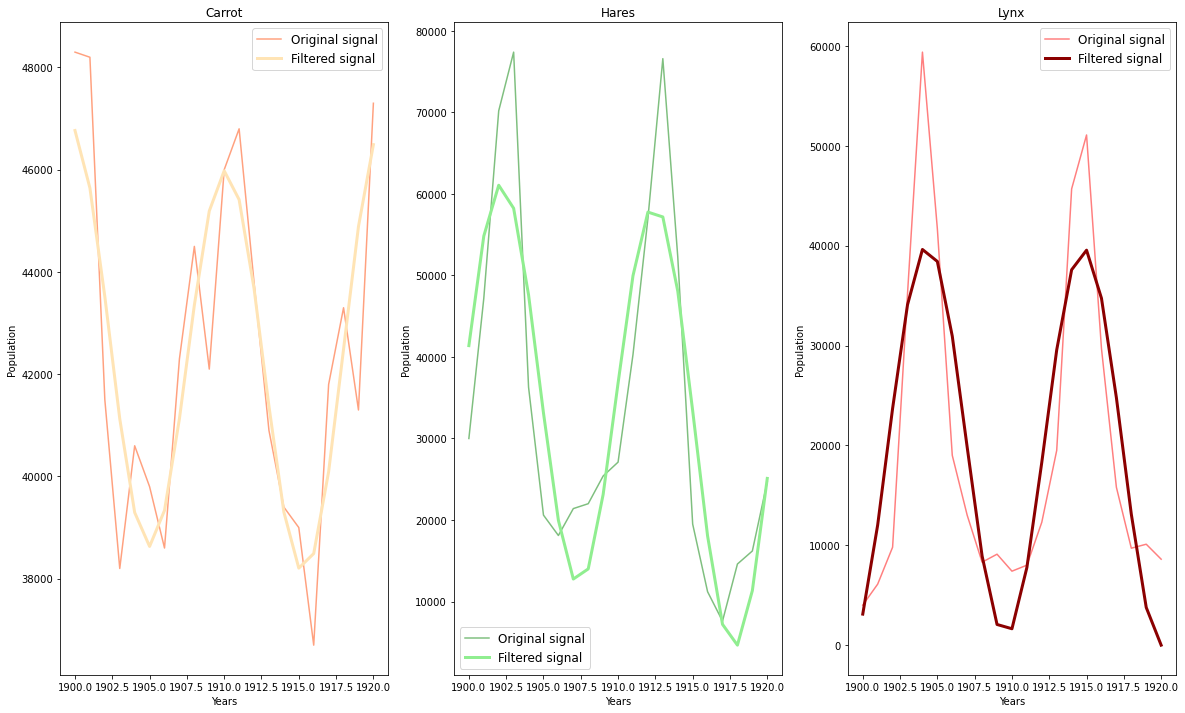

In [84]:
# plot the result of the IFFT
fig3 = plt.figure(figsize=(20,12))
gs3 = GridSpec(1, 3, width_ratios=[1, 1, 1])
ax7 = fig3.add_subplot(gs[0])
ax8 = fig3.add_subplot(gs[1])
ax9 = fig3.add_subplot(gs[2])

#hares
ax8.plot(years, harePopulation, alpha=0.5, label='Original signal', color = 'g')
ax8.plot(years, H_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'lightgreen')
ax8.set_xlabel('Years')
ax8.set_ylabel('Population')
ax8.set_title('Hares')
ax8.legend(loc='best', fontsize = 12)

#lynxes
ax9.plot(years, lynxPopulation, alpha=0.5, label='Original signal', color = 'r')
ax9.plot(years, L_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'darkred')
ax9.set_xlabel('Years')
ax9.set_ylabel('Population')
ax9.set_title('Lynx')
ax9.legend(loc='best', fontsize = 12)

#carrots
ax7.plot(years, carrotPopulation, alpha=0.5, label='Original signal', color = 'orangered')
ax7.plot(years, C_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'moccasin')
ax7.set_xlabel('Years')
ax7.set_ylabel('Population')
ax7.set_title('Carrot')
ax7.legend(loc='best', fontsize = 12)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise. OK
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale: OK
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Filtred Image')

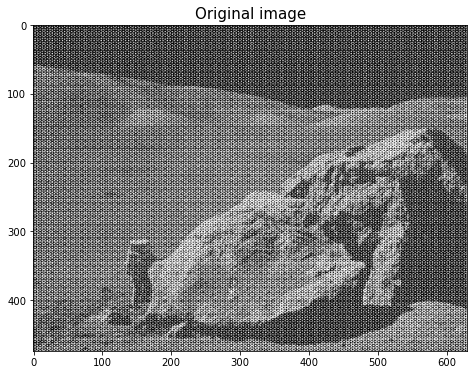

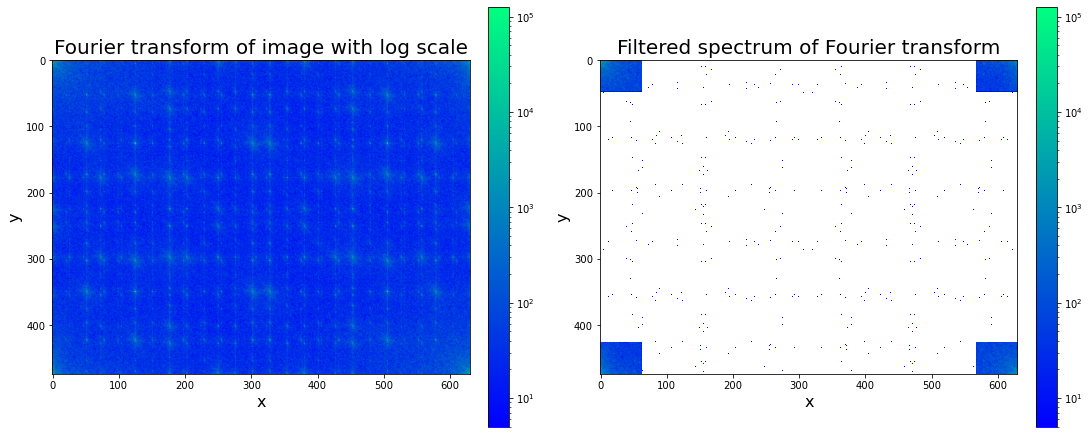

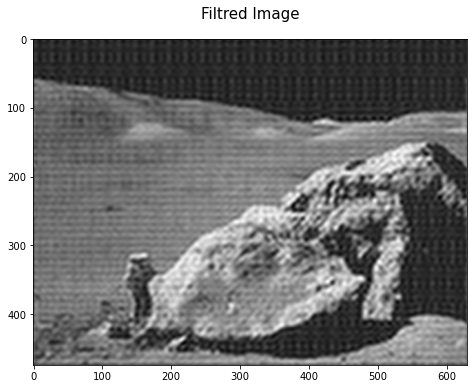

In [54]:
from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm

#importing the image as np array
image = plt.imread('moonlanding.png')
#plotting the image
plt.figure(figsize=(12,6))
plt.imshow(image,plt.cm.gray)
plt.title("Original image", fontsize=15)

#Performing 2D Fourier transform with fft2 from scipy.fftpack -> gives me an array
F_transf = fft2(image)

fig = plt.figure(figsize=(18,9))
gs = GridSpec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

#Plotting Fourier transform
im = ax1.imshow(abs(F_transf), norm=LogNorm(vmin=5), cmap='winter')
fig.colorbar(im, fraction=0.046, pad=0.04, ax=ax1)
ax1.set_title("Fourier transform of image with log scale", fontsize=20)
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)

#In order to eliminate the noise I have to cut the spectrum at high frequency

#setting the treshold
threshold = 0.1 
F_transf2 = F_transf.copy()
#taking rows and columns
r, c = F_transf2.shape 

#cutting all frequency above the trashold both from rows and columns
F_transf2[int(r*threshold):int(r*(1-threshold))] = 0 
F_transf2[:, int(c*threshold):int(c*(1-threshold))] = 0 

#plotting the filtred Fourier transform
image2 = plt.imshow(np.abs(F_transf2), norm=LogNorm(vmin=5), cmap='winter')
fig.colorbar(image2, fraction=0.046, pad=0.04, ax=ax2)
ax2.set_xlabel('x', fontsize=16)
ax2.set_ylabel('y', fontsize=16)
ax2.set_title('Filtered spectrum of Fourier transform', fontsize=20)

#performing the anti-Fourier transform and taking only the real part
filtred_im = fftpack.ifft2(F_transf2)
real_filtred_im = np.real(filtred_im)


#plot the reconstructed image
plt.figure(figsize=(12,6))
plt.imshow(real_filtred_im,plt.cm.gray)
plt.title('Filtred Image',fontsize=15, pad = 20)